In [3]:
import quandl

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [10]:
quandl.ApiConfig.api_key = 'M37DvDHvXsQJ9qzssDfG'
stock_data = quandl.get('NSE/TCS', start_date='2018-5-01', end_date='2018-5-27')
#Let's see the data
print(stock_data)

               Open     High      Low     Last    Close  Total Trade Quantity  \
Date                                                                            
2018-05-02  3530.50  3532.20  3471.30  3500.00  3499.75             1579023.0   
2018-05-03  3509.80  3526.00  3470.40  3481.75  3481.85             1880775.0   
2018-05-04  3492.00  3497.00  3470.00  3479.00  3480.75             1173622.0   
2018-05-07  3490.00  3490.00  3410.90  3428.00  3420.95             1742213.0   
2018-05-08  3434.70  3486.50  3396.70  3440.20  3441.20             1496410.0   
2018-05-09  3440.20  3494.75  3440.20  3488.50  3489.30             1307525.0   
2018-05-10  3502.95  3511.15  3440.20  3446.30  3451.25             1929339.0   
2018-05-11  3454.20  3485.00  3442.50  3461.00  3456.95             1313938.0   
2018-05-14  3457.00  3471.00  3410.80  3440.00  3433.55             1216947.0   
2018-05-15  3450.00  3495.80  3433.70  3487.00  3482.40              976445.0   
2018-05-16  3479.95  3509.00

In [12]:
# converting our stock data variable to a dataFrame
df = pd.DataFrame(stock_data)

In [13]:
df.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-05-02,3530.5,3532.2,3471.3,3500.00,3499.75,1579023.0,55218.26
2018-05-03,3509.8,3526.0,3470.4,3481.75,3481.85,1880775.0,65856.82
2018-05-04,3492.0,3497.0,3470.0,3479.00,3480.75,1173622.0,40902.42
2018-05-07,3490.0,3490.0,3410.9,3428.00,3420.95,1742213.0,59904.35
2018-05-08,3434.7,3486.5,3396.7,3440.20,3441.20,1496410.0,51593.22


In [17]:
df.to_csv('TCS.csv')

In [18]:
data = pd.read_csv('TCS.csv')

In [19]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-05-02,3530.5,3532.2,3471.3,3500.00,3499.75,1579023.0,55218.26
1,2018-05-03,3509.8,3526.0,3470.4,3481.75,3481.85,1880775.0,65856.82
2,2018-05-04,3492.0,3497.0,3470.0,3479.00,3480.75,1173622.0,40902.42
3,2018-05-07,3490.0,3490.0,3410.9,3428.00,3420.95,1742213.0,59904.35
4,2018-05-08,3434.7,3486.5,3396.7,3440.20,3441.20,1496410.0,51593.22


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 8 columns):
Date                    18 non-null object
Open                    18 non-null float64
High                    18 non-null float64
Low                     18 non-null float64
Last                    18 non-null float64
Close                   18 non-null float64
Total Trade Quantity    18 non-null float64
Turnover (Lacs)         18 non-null float64
dtypes: float64(7), object(1)
memory usage: 1.2+ KB


In [23]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

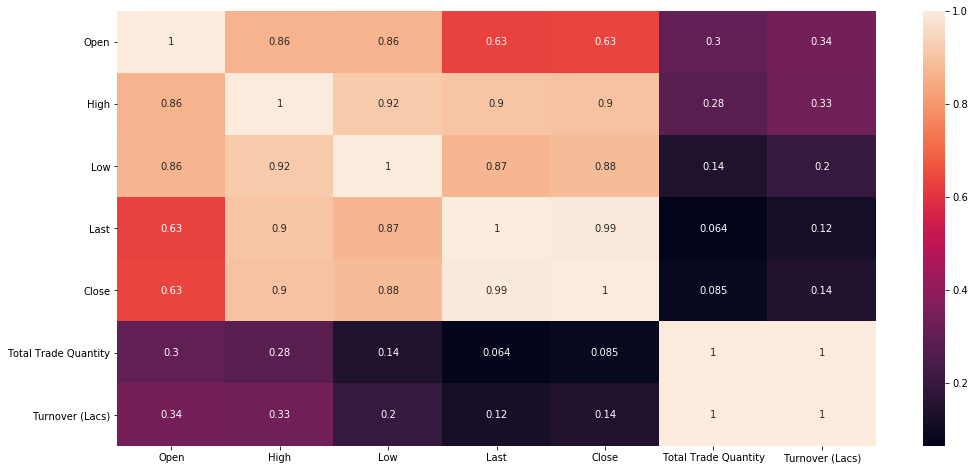

In [24]:
plt.figure(1,figsize=(17,8))
cor = sns.heatmap(data.corr(),annot=True)

In [30]:
x = data.loc[:,'High':'Turnover (Lacs)']
y = data.loc[:,'Open']

In [31]:
x.head()

,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,3532.2,3471.3,3500.00,3499.75,1579023.0,55218.26
1,3526.0,3470.4,3481.75,3481.85,1880775.0,65856.82
2,3497.0,3470.0,3479.00,3480.75,1173622.0,40902.42
3,3490.0,3410.9,3428.00,3420.95,1742213.0,59904.35
4,3486.5,3396.7,3440.20,3441.20,1496410.0,51593.22


In [27]:
y.head()

0    3530.5
1    3509.8
2    3492.0
3    3490.0
4    3434.7
Name: Open, dtype: float64

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state = 0)

In [34]:
# lets Fit Our Linear Regression Model
LR = LinearRegression()


In [36]:
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
LR.score(x_test,y_test)

0.3735198171924484

In [38]:
Test_data = [[2017.0 ,1979.6 ,1990.00 ,1992.70 ,2321216.0 ,46373.71]]
Prediction =  LR.predict(Test_data)
print(Prediction)

[2603.8675527]
